In [2]:
import numpy as np
import matplotlib.pyplot as plt

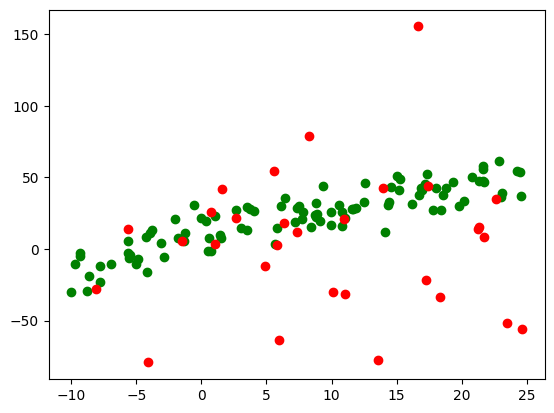

In [25]:
x_range = (-10, 25)
num_samples = 100
num_noise = 30

f_x = np.random.rand(num_samples) * (x_range[1] - x_range[0]) + x_range[0]
f_y = np.array([i * 2 + np.random.normal(0, 10) + 5 for i in f_x]) # y = 2x + 5 + noise
n_x = np.random.rand(num_noise) * (x_range[1] - x_range[0]) + x_range[0]
n_y = np.random.normal(0, 50, n_x.size) # y = norm(0, 100)
x = np.concatenate([f_x, n_x], axis=0)
y = np.concatenate([f_y, n_y], axis=0)
order = np.arange(x.size)
np.random.shuffle(order)
x = x[order].reshape(-1)
y = y[order].reshape(-1)
plt.scatter(f_x, f_y, c='g')
plt.scatter(n_x, n_y, c='r')
plt.show()

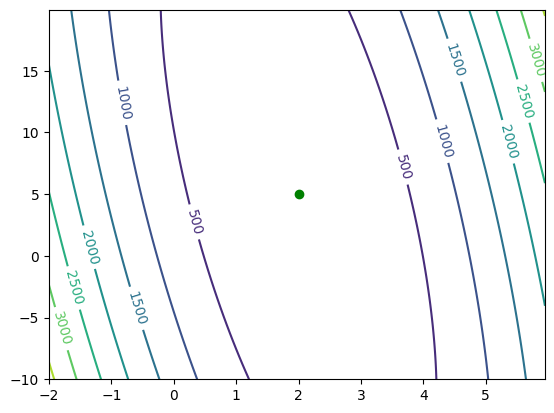

[2. 5.]


In [26]:
# loss function, kdyby data byla naměřená rovnoměrně a zcela přesně

delta = 0.05
w = np.arange(-2.0, 6, delta)
b = np.arange(-10, 20, delta)
W, B = np.meshgrid(w, b)
xs = np.arange(*x_range, 0.2)
ys = 2 * xs + 5
L =  ((((np.expand_dims(W, -1) * xs) + np.expand_dims(B, -1)) - ys)**2).mean(axis=2)
#L =((W * np.expand_dims(xs, (1, 2)) + B - np.expand_dims(ys, (1, 2)))**2).mean(axis=0)
CS = plt.contour(W, B, L)
plt.clabel(CS, inline=1, fontsize=10)
#plt.scatter(-1, -5, c='orange')
plt.scatter(2, 5, c='g')
plt.show()
print(np.linalg.lstsq(np.stack([xs, np.ones(xs.size)], axis=1), ys, rcond=None)[0])

In [19]:
def draw_loss_surface(xs, ys, sq_opt=None, p=None):
    lstsol = np.linalg.lstsq(np.stack([xs, np.ones(xs.size)], axis=1), ys, rcond=None)[0]
    delta = 0.05
    w = np.arange(min(-2.0, lstsol[0] -1), max(6.0, lstsol[0] + 1), delta)
    b = np.arange(min(-10.0, lstsol[1] -5), max(20.0, lstsol[1] + 5), delta)
    W, B = np.meshgrid(w, b)
    #L =  ((((np.expand_dims(W, -1) * xs) + np.expand_dims(B, -1)) - ys)**2).mean(axis=2)
    L =((W * np.expand_dims(xs, (1, 2)) + B - np.expand_dims(ys, (1, 2)))**2).mean(axis=0)
    #plt.axes().set_aspect('equal')
    CS = plt.contour(W, B, L)
    plt.clabel(CS, inline=1, fontsize=10)
    if p is not None:
        plt.scatter(p[0], p[1], c='orange')
    plt.scatter(2, 5, c='g')
    plt.scatter(*lstsol, c='b')
    if sq_opt is not None:
        plt.scatter(*sq_opt, c='aqua')
    plt.show()

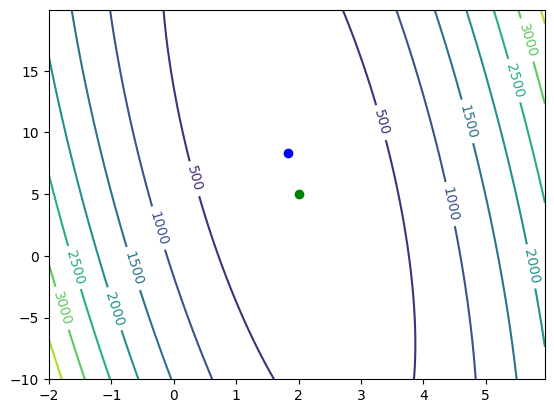

In [27]:
draw_loss_surface(f_x, f_y)

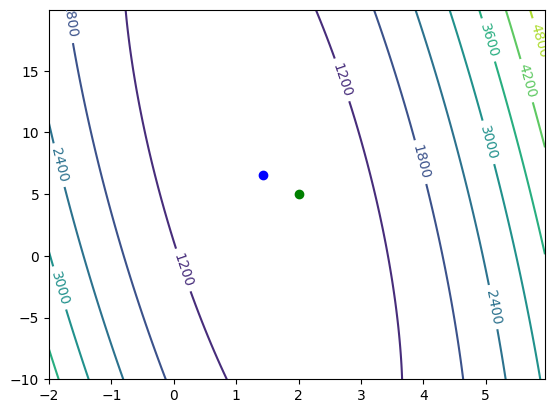

In [28]:
draw_loss_surface(x, y)

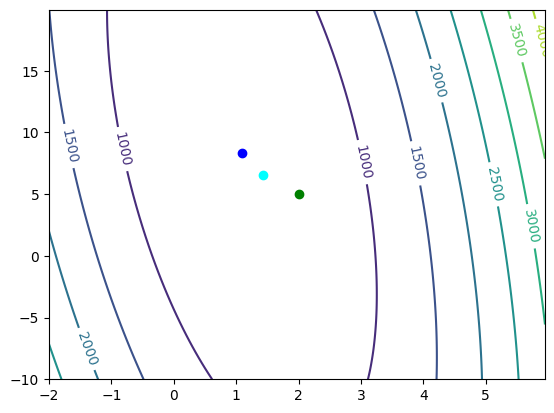

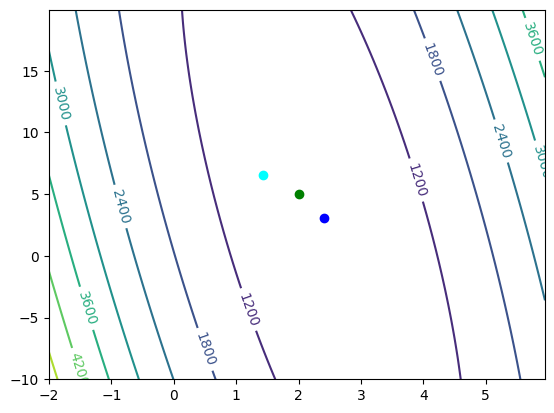

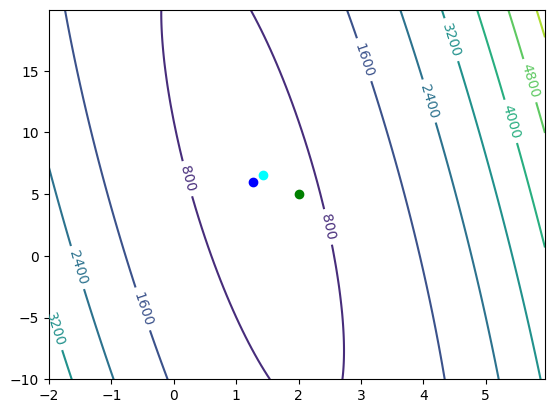

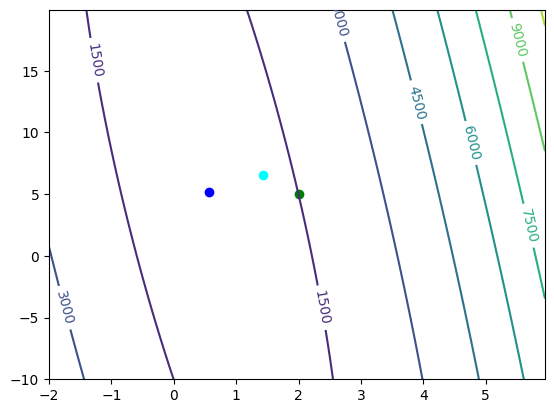

In [29]:
lstsol = np.linalg.lstsq(np.stack([x, np.ones(x.size)], axis=1), y, rcond=None)[0]
batch_size = 40
for i in range(0, x.size, batch_size):
    draw_loss_surface(x[i:i+batch_size], y[i:i+batch_size], lstsol)

In [8]:
x_range = 100
num_samples = 100
num_noise = 20

f_x = np.random.rand(num_samples) * x_range - x_range / 2
f_y = np.array([i * 2 + np.random.normal(0, 10) + 5 for i in f_x]) # y = 2x + 5 + noise
n_x = np.random.rand(num_noise) * x_range - x_range / 2
n_y = np.random.normal(0, 50, n_x.size) # y = norm(0, 100)
x = np.concatenate([f_x, n_x], axis=0)
y = np.concatenate([f_y, n_y], axis=0)
order = np.arange(x.size)
np.random.shuffle(order)
x = x[order].reshape(-1)
y = y[order].reshape(-1)
#plt.scatter(f_x, f_y, c='g')
#plt.scatter(n_x, n_y, c='r')
#plt.show()

130 65


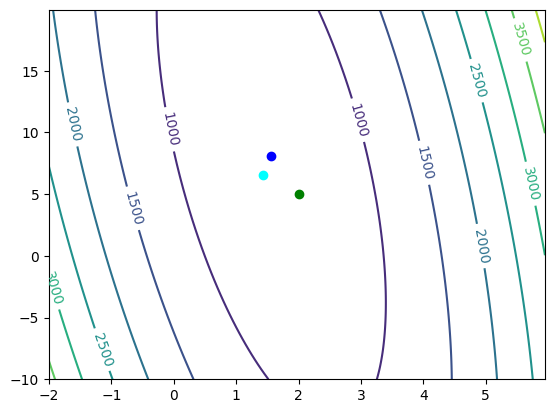

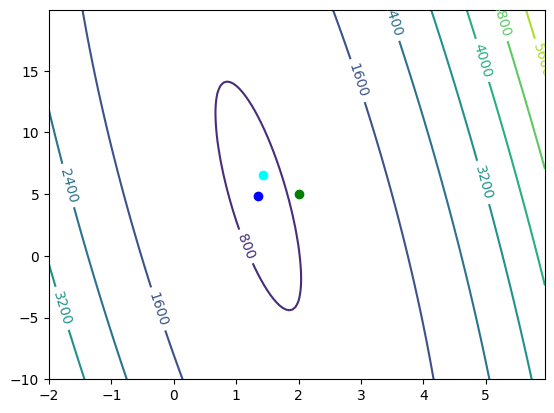

In [30]:
lstsol = np.linalg.lstsq(np.stack([x, np.ones(x.size)], axis=1), y, rcond=None)[0]
batch_size = int(x.size / 2)
print(x.size, batch_size)
for i in range(0, x.size, batch_size):
    draw_loss_surface(x[i:i+batch_size], y[i:i+batch_size], lstsol)


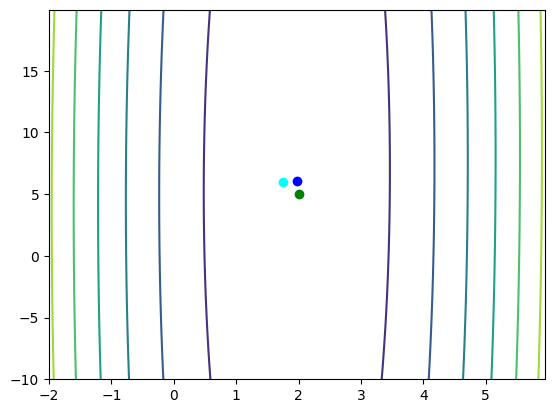

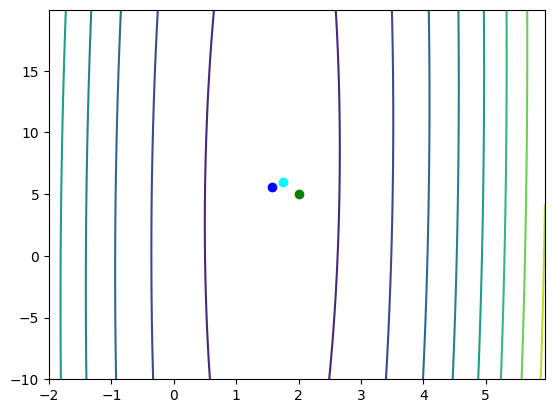

In [10]:
np.random.shuffle(order)
x = x[order].reshape(-1)
y = y[order].reshape(-1)

batch_size = int(x.size / 2)
for i in range(0, x.size, batch_size):
    draw_loss_surface(x[i:i+batch_size], y[i:i+batch_size], lstsol)

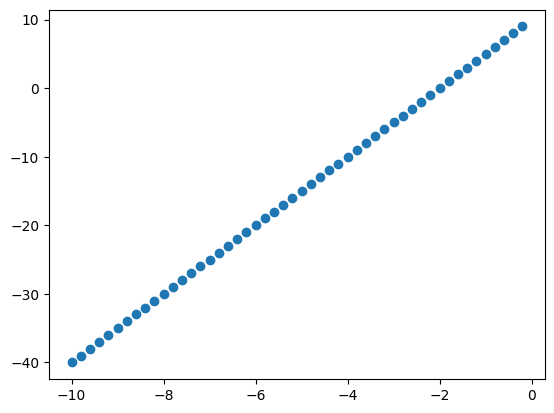

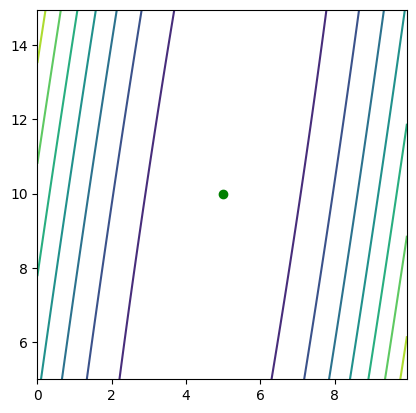

In [11]:
x_range = 5
mv = 5

w_f = 5
b_f = 10
delta = 0.05
w = np.arange(w_f -5, w_f + 5, delta)
b = np.arange(b_f -5,  b_f + 5, delta)
W, B = np.meshgrid(w, b)
xs = np.arange(-x_range -mv, x_range -mv, 0.2)
#xs = np.arange(0, 2 * x_range, 0.2)
ys = w_f * xs + b_f
#L =  ((((np.expand_dims(W, -1) * xs) + np.expand_dims(B, -1)) - ys)**2).mean(axis=2)
L =((W * np.expand_dims(xs, (1, 2)) + B - np.expand_dims(ys, (1, 2)))**2).mean(axis=0)
plt.scatter(xs, ys)
plt.show()
plt.axes().set_aspect('equal')
plt.contour(W, B, L)
#plt.scatter(-1, -5, c='orange')
plt.scatter(w_f, b_f, c='g')
plt.show()

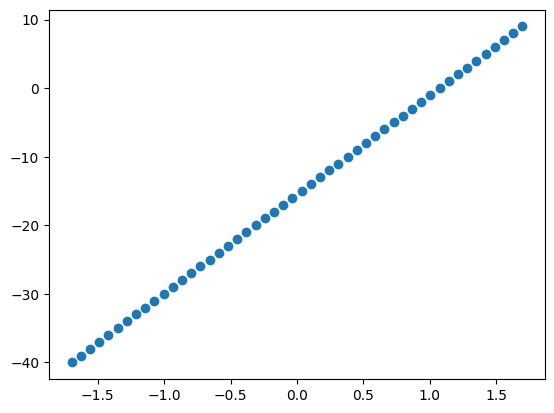

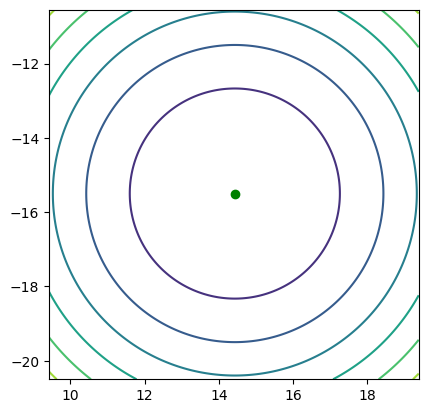

In [12]:
xs2 = (xs - xs.mean()) / xs.std()
ys2 = ys
plt.scatter(xs2, ys2)
plt.show()
w_f, b_f = np.linalg.lstsq(np.stack([xs2, np.ones(xs2.size)], axis=1), ys2, rcond=None)[0]
w = np.arange(w_f -5, w_f + 5, delta)
b = np.arange(b_f -5,  b_f + 5, delta)
W, B = np.meshgrid(w, b)
L =((W * np.expand_dims(xs2, (1, 2)) + B - np.expand_dims(ys2, (1, 2)))**2).mean(axis=0)
plt.axes().set_aspect('equal')
plt.contour(W, B, L)
#plt.scatter(-1, -5, c='orange')
plt.scatter(w_f, b_f, c='g')
plt.show()

In [31]:
def draw_loss_surface(xs, ys, sq_opt=None, p=None):
    lstsol = np.linalg.lstsq(np.stack([xs, np.ones(xs.size)], axis=1), ys, rcond=None)[0]
    print(lstsol)
    delta = 0.05
    w = np.arange(lstsol[0] -15, lstsol[0] + 15, delta)
    b = np.arange(lstsol[1] -15, lstsol[1] + 15, delta)
    W, B = np.meshgrid(w, b)
    #L =  ((((np.expand_dims(W, -1) * xs) + np.expand_dims(B, -1)) - ys)**2).mean(axis=2)
    L =((W * np.expand_dims(xs, (1, 2)) + B - np.expand_dims(ys, (1, 2)))**2).mean(axis=0)
    plt.axes().set_aspect('equal')
    CS = plt.contour(W, B, L)
    plt.clabel(CS, inline=1, fontsize=10)
    if p is not None:
        plt.scatter(p[0], p[1], c='orange')
    plt.scatter(*lstsol, c='b')
    if sq_opt is not None:
        plt.scatter(*sq_opt, c='aqua')
    plt.show()

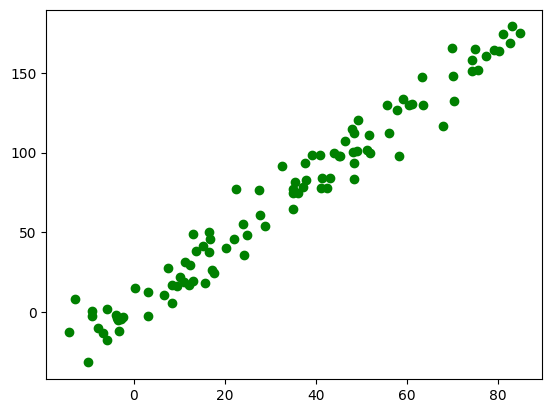

In [32]:
x_range = 100
num_samples = 100
num_noise = 20
mv = 35

f_x = np.random.rand(num_samples) * x_range - x_range / 2 + mv
f_y = np.array([i * 2 + np.random.normal(0, 10) + 5 for i in f_x]) # y = 2x + 5 + noise
n_x = np.random.rand(num_noise) * x_range - x_range / 2
n_y = np.random.normal(0, 50, n_x.size) # y = norm(0, 100)
x = np.concatenate([f_x, n_x], axis=0)
y = np.concatenate([f_y, n_y], axis=0)
order = np.arange(x.size)
np.random.shuffle(order)
x = x[order].reshape(-1)
y = y[order].reshape(-1)
plt.scatter(f_x, f_y, c='g')
#plt.scatter(n_x, n_y, c='r')
plt.show()

[2.02004768 4.78056598]


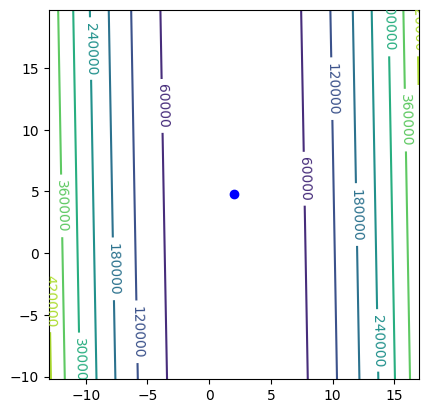

In [33]:
draw_loss_surface(f_x, f_y)

[199.81702058 -23.99495595]


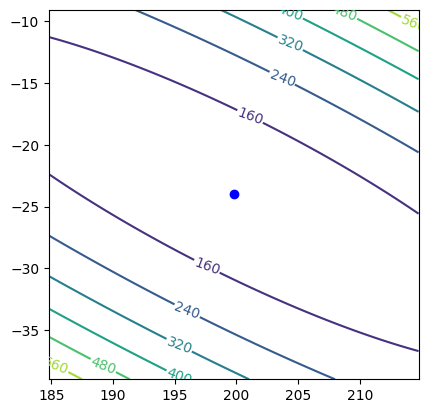

In [34]:
draw_loss_surface((f_x - f_x.min()) / (f_x.max() - f_x.min()), f_y)

[55.18168303 71.56351384]


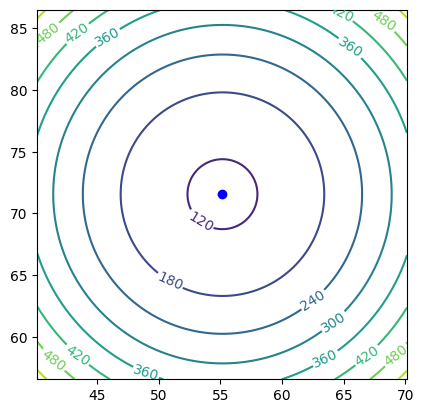

In [35]:
draw_loss_surface((f_x - f_x.mean())/f_x.std(), f_y)

In [17]:
m = f_x.mean()
s = f_x.std()

In [18]:
x = 200
y = 2.04685136 * x + 3.18943957
print(y)
x = (x - m) / s
y = 57.34307638  * x + 75.00276652
print(y)

412.55971156999993
399.11502779587966


In [19]:
a = np.array(range(100))
a = (a - a.mean()) / a.std()
print(a[0], a[-1])

-1.7148160424389376 1.7148160424389376


In [20]:
np.sqrt(3)

1.7320508075688772